# Modelo de Prueba

Por medio de este programa vamos a tratar de hacer uso de un modelo de arbol de deciciones, para poder determinar si los pasajeros fueron transportados a otra dimension o no. 

In [1]:
## IMPORTAMOS LAS LIBRERIAS 
import pandas as pd
import numpy as np

In [2]:
## LEEMOS EL ARCHIVO
df = pd.read_csv("train.csv")

In [3]:
## cAMBIAMOS LOS VALORES QUE SEAN NULOS O NAN DEBIDO A QUE ESTE MODELO NECESITA QUE LOS VALORES NO SEAN DE ESTA FORMA
df
df.fillna(0,inplace=True)  ## CON EL INPLACE HACEMOS QUE EL CAMBIO SE VEA REFLEJADO EN NUESTRO DATAFRAME
df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [4]:
## LEEMOS LOS OTROS ARCHIVOS, ESTE VA A SER EL ARCHIVO QUE TIENE LOS DAOS DE PRUEBA, O EL CONOCIDO X_TEST O  VAL_X 
## SOLO FALTA DEFINIR BIEN LAS COLUMNAS QUE VAMOS A USAR  
df1 = pd.read_csv('test.csv')


In [5]:
df1.fillna(0,inplace=True)
df1

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter
4273,9269_01,Earth,False,0,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron
4274,9271_01,Mars,True,D/296/P,55 Cancri e,0.0,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore
4275,9273_01,Europa,False,D/297/P,0,0.0,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale


In [6]:
### eSTE VA A ASER EL CONOCIDO Y_TEST O EL VAL_Y
df2 = pd.read_csv('sample_submission.csv')

In [7]:

df2

,PassengerId,Transported
0,0013_01,False
1,0018_01,False
2,0019_01,False
3,0021_01,False
4,0023_01,False
...,...,...
4272,9266_02,False
4273,9269_01,False
4274,9271_01,False
4275,9273_01,False


Analizamos cuales son las columnas,d e esta manera, podemos ver cuales pueden ser de ayuda y cuales no. 

In [8]:
df.columns


Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')

Pedimos ver que valores contiene la columna que va a ser nuestro target. 

In [9]:
df['Transported']

0       False
1        True
2       False
3       False
4        True
        ...  
8688    False
8689    False
8690     True
8691    False
8692     True
Name: Transported, Length: 8693, dtype: bool

Definimos el target 

In [10]:
Y = df['Transported']

In [11]:
Y

0       False
1        True
2       False
3       False
4        True
        ...  
8688    False
8689    False
8690     True
8691    False
8692     True
Name: Transported, Length: 8693, dtype: bool

Escogemos las columnas que van a funcionar como features en nuestor problema, es importante notar que en este caso, como vamos a  usar el modelo 'DecisionTreeRegressor' debemos de tener en cuenta que necesitamos features que sean numeros, este no puede trabajar con strings. Por esta razon, hacemos uso de las siguientes columnas del Data Frame

In [12]:
features = ['CryoSleep','Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'] 

In [13]:
## AHORA, DEFINIMOS BIEN EL DATA FRAME, EN TERMOINOS DE LAS COLUMNAS ANTES MENCIONADAS.
X = df[features]

In [14]:
## OBSERVAMOS LOS DATOS QUE SELECCIONAMOS
X.head()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,False,39.0,False,0.0,0.0,0.0,0.0,0.0
1,False,24.0,False,109.0,9.0,25.0,549.0,44.0
2,False,58.0,True,43.0,3576.0,0.0,6715.0,49.0
3,False,33.0,False,0.0,1283.0,371.0,3329.0,193.0
4,False,16.0,False,303.0,70.0,151.0,565.0,2.0


In [15]:
X.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000
mean,28.234326,220.009318,448.434027,169.572300,304.588865,298.261820
std,14.912090,660.519050,1595.790627,598.007164,1125.562559,1134.126417
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,37.000000,41.000000,61.000000,22.000000,53.000000,40.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [16]:
## COMPROBAMOS SI ALGUNOS VALORES SON NAN
X.isna()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
8688,False,False,False,False,False,False,False,False
8689,False,False,False,False,False,False,False,False
8690,False,False,False,False,False,False,False,False
8691,False,False,False,False,False,False,False,False


Ahora que ya tenemos bien definidos nuestros festures y el target, debemos de llamar la funcion en cuestion y ejecutarla. 

In [17]:
## Exportamos la funcion o modelo
from sklearn.tree import DecisionTreeRegressor

## iniciamos la funcion, hay que recordar que se debe de iniciar el objeto y guardarlo en una variable. 
###La variable random_state debe ser un numero entero.
modelo_prueba = DecisionTreeRegressor(random_state=1)


## Declaramos con que variables debe de entrenar y cual es el target. 
modelo_prueba.fit(X,Y)

DecisionTreeRegressor(random_state=1)

Imprimimos lo que sera un ejemplo de como esta trabajando el modelo, con ayuda de las primeras 5 filas del data frame 

In [18]:
print("Making predictions for the following 5 people:")
print(X.head())
print("The predictions are")
print(modelo_prueba.predict(X.head()))

Making predictions for the following 5 people:
  CryoSleep   Age    VIP  RoomService  FoodCourt  ShoppingMall     Spa  VRDeck
0     False  39.0  False          0.0        0.0           0.0     0.0     0.0
1     False  24.0  False        109.0        9.0          25.0   549.0    44.0
2     False  58.0   True         43.0     3576.0           0.0  6715.0    49.0
3     False  33.0  False          0.0     1283.0         371.0  3329.0   193.0
4     False  16.0  False        303.0       70.0         151.0   565.0     2.0
The predictions are
[0.66666667 1.         0.         0.         1.        ]


Comparamos conlos valores de Y, es importante notar que las predicciones son numeros entre 0 y 1, a diferencia de nuestro target, el cual simplemente es un boolean

In [19]:
Y.head()

0    False
1     True
2    False
3    False
4     True
Name: Transported, dtype: bool

Ahora hacemos predicciones para las ultimas 5 filas.

In [20]:
print("Making predictions for the following 5 people:")
print(X.tail())
print("The predictions are")
print(modelo_prueba.predict(X.tail()))

Making predictions for the following 5 people:
     CryoSleep   Age    VIP  RoomService  FoodCourt  ShoppingMall     Spa  \
8688     False  41.0   True          0.0     6819.0           0.0  1643.0   
8689      True  18.0  False          0.0        0.0           0.0     0.0   
8690     False  26.0  False          0.0        0.0        1872.0     1.0   
8691     False  32.0  False          0.0     1049.0           0.0   353.0   
8692     False  44.0  False        126.0     4688.0           0.0     0.0   

      VRDeck  
8688    74.0  
8689     0.0  
8690     0.0  
8691  3235.0  
8692    12.0  
The predictions are
[0.         0.79824561 1.         0.         1.        ]


Comparamos

In [21]:
Y.tail()

8688    False
8689    False
8690     True
8691    False
8692     True
Name: Transported, dtype: bool

### Que tan preciso es el modelo? 

Para poder medir el error, es necesario usar algun modelo que nos ayude a calular el error, uno de estos se llama Mean Absolute Error (also called MAE). Este simplemente toma las diferencias de los valores de el target con el predecido, pero toma valor absoluto de este mismo, asi finalmente, toma el promedio de todos las diferencias. Para iniciar este modelo, es necesario llamarlo de la paqueteria, con ayuda del siguiente comando: 

In [22]:
from sklearn.metrics import mean_absolute_error

predicted_people_transported = modelo_prueba.predict(X)
mean_absolute_error(Y,predicted_people_transported)

0.12806079627004882

### Validation Data

Ahora, lo que deberiamos de hacer es dividir los datos del dataframe en los conocidos train_X, train_Y y los Val_x, Val_y para poder hacer correctamente la validacion de los datos y el calculo del ``mean_absolute_error``, esto se haria con uso del siguiente coidgo:

``from sklearn.model_selection import train_test_split``

``train_X, val_X, train_y, val_y = train_test_split(X,y,random_state=0) ``

Despues deberiamos probar el error de los datos de validacion entrenados y de  los datos de validacion o test, en nuestro caso, es neceasrio hacer el paso de seleccionar los datos correctgos  del df1, ya que aun no los hacemos, esto se hace con: 


In [75]:
test_X = df1[features]
test_X

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,True,27.0,False,0.0,0.0,0.0,0.0,0.0
1,False,19.0,False,0.0,9.0,0.0,2823.0,0.0
2,True,31.0,False,0.0,0.0,0.0,0.0,0.0
3,False,38.0,False,0.0,6652.0,0.0,181.0,585.0
4,False,20.0,False,10.0,0.0,635.0,0.0,0.0
...,...,...,...,...,...,...,...,...
4272,True,34.0,False,0.0,0.0,0.0,0.0,0.0
4273,False,42.0,False,0.0,847.0,17.0,10.0,144.0
4274,True,0.0,False,0.0,0.0,0.0,0.0,0.0
4275,False,0.0,False,0.0,2680.0,0.0,0.0,523.0


In [89]:
test_y = df2['Transported']
test_y

0       False
1       False
2       False
3       False
4       False
        ...  
4272    False
4273    False
4274    False
4275    False
4276    False
Name: Transported, Length: 4277, dtype: bool

### Realizemos nuevamente el entrenamiento de nuestro modelo y el calculo del error

In [77]:
### este modulo es paera dividir los datos, pero ya estan divididos jajaj
from sklearn.model_selection import train_test_split 

#### Dividimos los datos
train_X, val_X, train_y, val_y = train_test_split(X,Y,random_state=0)


### iniciamos el modelo
modelo_prueba = DecisionTreeRegressor()


### Entrenamos el modelo con los datos del primer Data Frame
modelo_prueba.fit(train_X,train_y)

### hacemos predicciones para el conjunto de datos de vqalidacion, o los datos  de prube 'test' 
val_predictions  = modelo_prueba.predict(val_X)

## calculamos el error de los datos, aqui se considera los valores predecidos y los que ya conocemos. 
print(mean_absolute_error(val_y,val_predictions))

0.3023731025688558


## Underfitting and Overfitting

Overfitting es basicamente hacer cosas de mas, en este caso del arbol de decisiones dependemos de las ramas que vamos a ir obteniendo y de las posibles variables que vamos a tener, esto es debidoa que si hacemos varias decisiones, vamos a obtener a su vez, diferentes subgrupitos de pasajeros. 

Asi, cuando nosotros obtengamos muchos subgrupos, posiblemente tendremos menos gente en cada grupo, con lo cual podemos llegar a obtener predicciones muy malas con este modelo. 

En el caso de underfitting, es similar, solo que aqui lo que afecta es que realizamos muy pocas decisiones y subgrupos, con lo cual dejamos un rango muy amplio de personas en algunos grupos, con lo cual nuestro error va a ir mal en diferentes casos. 

lo que queremos basicamente es lo siguiente: 

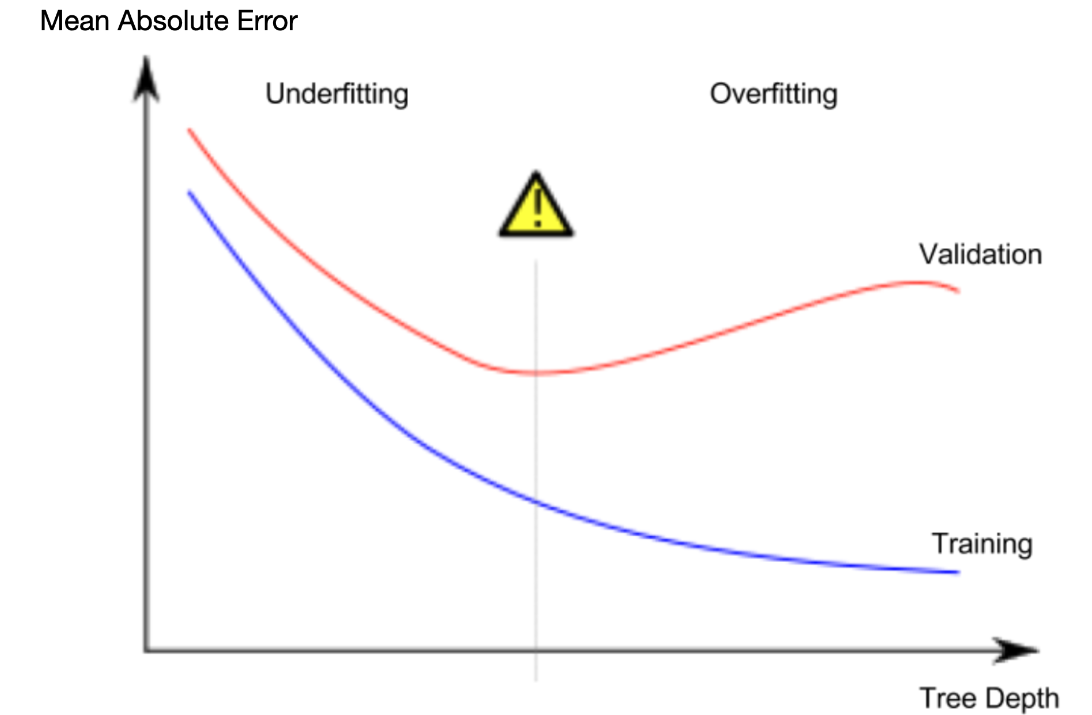

El punto exacto donde se minimica el erro y estamos justo a la mitad, entre el Overfitting y el Underfitting.

Lo que podemos hacer es una funcion, que nos compare algunos valores de nodos para el arbol de decisiones, este parametro no lo habiamos mencionado, pero basicamente ``max_leaf_nodes`` nos ayuda a controlas el numero de decisiones que va a tomar el arbol. Definamos la funcion que nos calcule el error en funcion del numero de nodos, esto es basicamente lo que habiamos hecho anteriormente: 

In [39]:
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor


def get_mae(max_leaf_nodes,train_X, val_X, train_y, val_y):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes,random_state=0)
    model.fit(train_X, train_y)
    pred_val = model.predict(val_X)
    mae = mean_absolute_error(val_y, pred_val)
    return(mae)

Despues necesitamos probar con algunos valores de numero de nodos, esto lo haremos con algun ciclo for 

In [81]:
for max_leaf_nodes in [5, 50, 500, 5000]:
    my_mae = get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y)
    #print("Max leaf nodes: %d \t\t Mean Absolute Error: %d" %(max_leaf_nodes, my_mae))  ##NO SE POR QUE NO SALIO, PERO MEH
    print("Numero de nodos: %d \t Error:" %(max_leaf_nodes))
    #print("Error:")
    print(my_mae)

Numero de nodos: 5 	 Error:
0.34303081524094586
Numero de nodos: 50 	 Error:
0.30680478085629814
Numero de nodos: 500 	 Error:
0.29980542974948027
Numero de nodos: 5000 	 Error:
0.29823326816223206


#### Parece ser que en este caso, el mejor numero de nodos es al rededor de 5000. 

Ahora, idealmente es mejor entrenar a nuestro modelo con todos los datos, en el caso de que hayamos usado la funcion que divide en dos los datos, es facil usar el DF que tiene todos los datos, pero en nuestro caso, es necesario unir ambos DF, esto se hace con concat, como se ve a continuacion: 

In [56]:
### Aqui me equivoque, si debi separar los datos con la funcion de sklearn. 
new_X = pd.concat([X,val_X])

In [57]:
new_X

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,False,39.0,False,0.0,0.0,0.0,0.0,0.0
1,False,24.0,False,109.0,9.0,25.0,549.0,44.0
2,False,58.0,True,43.0,3576.0,0.0,6715.0,49.0
3,False,33.0,False,0.0,1283.0,371.0,3329.0,193.0
4,False,16.0,False,303.0,70.0,151.0,565.0,2.0
...,...,...,...,...,...,...,...,...
4272,True,34.0,False,0.0,0.0,0.0,0.0,0.0
4273,False,42.0,False,0.0,847.0,17.0,10.0,144.0
4274,True,0.0,False,0.0,0.0,0.0,0.0,0.0
4275,False,0.0,False,0.0,2680.0,0.0,0.0,523.0


In [58]:
new_y = pd.concat([Y,val_y])

In [59]:
new_y

0       False
1        True
2       False
3       False
4        True
        ...  
4272    False
4273    False
4274    False
4275    False
4276    False
Name: Transported, Length: 12970, dtype: bool

In [96]:
#Ahora entrenemos el modelo con el numero de nodos que mejor funciona. 
final_model = DecisionTreeRegressor(max_leaf_nodes = 5000, random_state=0)

final_model.fit(X,Y)

DecisionTreeRegressor(max_leaf_nodes=5000, random_state=0)

Hacemos una prueba con algunos datos: 

In [98]:
### hacemos predicciones para el conjunto de datos de vqalidacion
val_predict  = final_model.predict(val_X)

## calculamos el error de los datos, aqui se considera los valores predecidos y los que ya conocemos. 
print(mean_absolute_error(val_y,val_predict))

0.13003830844079356


Se reduce el error.

vamos a predecir algunos valores:

In [99]:
changos = final_model.predict(X.tail())
print(changos)

print(Y.tail())

[0.         0.79824561 1.         0.         1.        ]
8688    False
8689    False
8690     True
8691    False
8692     True
Name: Transported, dtype: bool


# Random Forest 

Este modelo basicamente  usa muchos arboles y hace predicciones por medio de hacer un promedio de la predicciones de cada componenente del arbol de decisiones. con esto, generalmente hace predicciones mucho mejores en cuanto a precision que un simple arbol de decisiones y este trabaja bien bajo lo parametros que tiene por defecto. 

Para trabajar con este modelo, es necesario exportarlo de la libreria de ScikitLearn y entrenarlo, lo cual vamos a hacer a continuacion, el modelo se llama ``RandomForestRegressor`` 

In [100]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

forest_model = RandomForestRegressor(random_state = 1)
forest_model.fit(X,Y)
forest_predict = forest_model.predict(test_X)
print(mean_absolute_error(test_y, forest_predict))

0.5157886476804782


Esta es la forma de exportar el output necesario para las competencias en Kaggle, exportamos lo que seria los valores predecidos para el conjunto de prueba, claro, esto fue entrenado con todos los datos del DataFrame. 

In [95]:
output = pd.DataFrame({'PassengerId': df1.PassengerId,
                       'Transported': forest_predict})
output.to_csv('submission.csv', index=False)

Using the Iris dataset, we can construct a tree as follows:

In [101]:
from sklearn.datasets import load_iris
from sklearn import tree
iris = load_iris()
X, Y = iris.data, iris.target
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, Y)

Once trained, you can plot the tree with the plot_tree function:

[Text(0.5, 0.9166666666666666, 'x[3] <= 0.8\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(0.4230769230769231, 0.75, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(0.5769230769230769, 0.75, 'x[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(0.3076923076923077, 0.5833333333333334, 'x[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(0.15384615384615385, 0.4166666666666667, 'x[3] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(0.07692307692307693, 0.25, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(0.23076923076923078, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.46153846153846156, 0.4166666666666667, 'x[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(0.38461538461538464, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.5384615384615384, 0.25, 'x[0] <= 6.95\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(0.46153846153846156, 0.08333333333333333, 'gini 

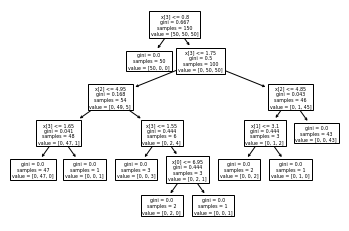

In [102]:
tree.plot_tree(clf)